csv ref : https://www.kaggle.com/code/parulpandey/penguin-dataset-the-new-iris/data

In [1]:
import pandas as pd
penguin_df = pd.read_csv('/content/sample_data/penguins_size.csv')
penguin_df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


#### Edit csv file with the following steps
* Delete island
* Delete sex
* Replace Adelie with 0
* Replace Chinstrap with 1 • Replace Gentoo with 2
* Move species

In [2]:
penguin_size_df = pd.read_csv('/content/sample_data/penguin_size_edited.csv').dropna()
penguin_size_df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,species
0,39.1,18.7,181.0,3750.0,0
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
4,36.7,19.3,193.0,3450.0,0
5,39.3,20.6,190.0,3650.0,0
...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,2
340,46.8,14.3,215.0,4850.0,2
341,50.4,15.7,222.0,5750.0,2
342,45.2,14.8,212.0,5200.0,2


In [3]:
penguin_size_df['flipper_length_mm'] = penguin_size_df['flipper_length_mm']/ 10
penguin_size_df['body_mass_g'] = penguin_size_df['body_mass_g']/100
penguin_size_df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,species
0,39.1,18.7,18.1,37.50,0
1,39.5,17.4,18.6,38.00,0
2,40.3,18.0,19.5,32.50,0
4,36.7,19.3,19.3,34.50,0
5,39.3,20.6,19.0,36.50,0
...,...,...,...,...,...
338,47.2,13.7,21.4,49.25,2
340,46.8,14.3,21.5,48.50,2
341,50.4,15.7,22.2,57.50,2
342,45.2,14.8,21.2,52.00,2


In [4]:
for i in range(1,3): ## 為啥要複製四遍
    penguin_size_df = penguin_size_df.append(penguin_size_df)
penguin_size_df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,species
0,39.1,18.7,18.1,37.50,0
1,39.5,17.4,18.6,38.00,0
2,40.3,18.0,19.5,32.50,0
4,36.7,19.3,19.3,34.50,0
5,39.3,20.6,19.0,36.50,0
...,...,...,...,...,...
338,47.2,13.7,21.4,49.25,2
340,46.8,14.3,21.5,48.50,2
341,50.4,15.7,22.2,57.50,2
342,45.2,14.8,21.2,52.00,2


In [5]:
penguin_size_df.shape

(1368, 5)

## Train Test Spilt

In [6]:
from sklearn.model_selection import train_test_split
feature =['culmen_length_mm','culmen_depth_mm','flipper_length_mm','body_mass_g']
labels = 'species'
x_train, x_test, y_train, y_test = train_test_split(penguin_size_df[feature].values, penguin_size_df[labels].values, test_size=0.30, random_state=0)

print('Training Set: %d, Tes Set: %d \n' %(len(x_train), len(x_test)))
print(x_train)
print(y_train)

Training Set: 957, Tes Set: 411 

[[42.8  14.2  20.9  47.  ]
 [43.3  14.   20.8  45.75]
 [50.2  18.7  19.8  37.75]
 ...
 [53.5  19.9  20.5  45.  ]
 [50.8  19.   21.   41.  ]
 [39.1  18.7  18.1  37.5 ]]
[2 2 1 0 0 1 2 2 2 2 0 0 1 1 0 1 0 0 0 1 2 1 1 0 1 2 1 1 2 0 2 0 2 1 2 0 0
 2 0 2 2 0 1 2 0 1 2 2 0 1 0 0 0 2 0 2 0 1 0 0 2 0 2 2 1 0 0 0 1 2 0 2 1 1
 0 0 2 0 2 2 1 0 0 2 2 2 1 0 0 0 2 0 1 2 1 0 1 2 2 1 0 2 0 0 2 0 1 0 0 2 2
 1 2 2 2 0 0 0 1 0 1 0 2 1 0 2 1 2 0 0 2 0 2 0 2 0 2 0 0 2 2 2 0 1 2 1 1 0
 1 0 2 0 2 0 2 1 0 1 0 2 0 2 2 0 0 0 2 1 2 0 1 1 0 1 2 0 2 0 0 0 0 0 0 0 1
 1 1 0 0 0 0 2 0 0 0 0 1 1 0 1 2 2 2 0 2 1 2 1 2 0 2 0 1 1 2 1 0 0 1 0 0 2
 0 0 2 2 0 2 0 2 0 2 1 0 0 0 1 0 2 0 0 2 0 1 0 0 0 2 1 2 2 2 1 2 2 2 0 1 0
 2 1 2 2 0 1 0 2 2 0 1 2 0 0 0 0 0 2 0 2 1 0 2 2 0 1 1 0 0 2 2 1 2 0 0 2 1
 0 2 1 0 2 0 0 0 0 1 2 2 2 2 1 0 0 2 2 2 2 2 1 1 2 2 1 0 0 0 2 0 0 1 2 0 0
 2 1 2 0 0 0 0 2 0 2 0 2 0 2 2 0 2 0 1 0 2 0 0 0 0 1 0 0 0 0 0 1 0 2 0 2 0
 0 2 0 2 2 2 2 0 2 2 1 0 1 1 0 0 0 2 2 2 0 2 2 0

### Run with PyTorch

In [7]:
!pip install torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
import torch
import torch.nn as nn
import torch.utils.data as td
# Set random seed for reproducability torch.manual_seed(0)
print("Libraries imported - ready to use PyTorch", torch.__version__)

Libraries imported - ready to use PyTorch 1.13.0+cu116


In [9]:
# Preparing Train data
train_x = torch.Tensor(x_train).float()
train_y = torch.Tensor(y_train).long()
train_ds = td.TensorDataset(train_x, train_y) 
train_loader = td.DataLoader(train_ds, batch_size=20, shuffle=False, num_workers=1)
# Preparing Test data
test_x = torch.Tensor(x_test).float()
test_y = torch.Tensor(y_test).long()
test_ds = td.TensorDataset(test_x, test_y) 
test_loader = td.DataLoader(test_ds, batch_size=20, shuffle=False, num_workers=1)

In [20]:
class NModel(nn.Module):
  def __init__(self):
    super(NModel, self).__init__() 
    self.fc1 = nn.Linear(len(feature), 10) 
    self.fc2 = nn.Linear(10, 10)
    self.fc3 = nn.Linear(10, 3)
  def forward(self, x):
    x = torch.relu(self.fc1(x))
    x = torch.relu(self.fc2(x))
    x = torch.softmax(self.fc3(x), dim=1)

    return x
model = NModel() 
print(model)

NModel(
  (fc1): Linear(in_features=4, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=10, bias=True)
  (fc3): Linear(in_features=10, out_features=3, bias=True)
)


In [21]:
def train(model, data_loader, optimizer): 
# Set the model to training mode 
  model.train()
  train_loss = 0
  for batch, tensor in enumerate(data_loader): 
    data, target = tensor
    # feedforward step
    optimizer.zero_grad()
    out = model(data)
    loss = loss_criteria(out, target)
    train_loss += loss.item() # backpropagation to improve the model performances 
    loss.backward()
    optimizer.step() 
  # Return average loss of the training
  avg_loss = train_loss / (batch+1)
  print('Training set: Average loss: {:.6f}'.format(avg_loss))
  return avg_loss

In [24]:
def test(model, data_loader):
  model.eval() 
  test_loss = 0 
  correct = 0 
  with torch.no_grad():
    batch_count = 0
    for batch, tensor in enumerate(data_loader): 
      batch_count += 1
      data, target = tensor
        # Get the predictions
      out = model(data) # calculate the loss
      test_loss += loss_criteria(out, target).item() # Calculate the accuracy
      _, predicted = torch.max(out.data, 1)
      correct += torch.sum(target==predicted).item()

  # Calculate the average loss and total accuracy for this epoch
  avg_loss = test_loss/batch_count
  print('Validation set: Average loss: {:.6f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    avg_loss, correct, len(data_loader.dataset),
    100. * correct / len(data_loader.dataset)))
  # return average loss for the epoch 
  return avg_loss

In [25]:
# Specify the loss criteria (CrossEntropyLoss for multi-class classification)
loss_criteria = nn.CrossEntropyLoss()
# We are using Adam optimizer
learning_rate = 0.001 # try different learning rate
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate) # setting the Adam algorithm 
optimizer.zero_grad()
# We'll be saving metrics for each epoch in these arrays
epoch_nums = []
training_loss = []
validation_loss = []# Train over 50 epochs
epochs = 50
for epoch in range(1, epochs + 1): 
  print('Epoch: {}'.format(epoch)) # Feed training data into the model to optimize the weights 
  train_loss = train(model, train_loader, optimizer)
  # Feed the test data into the model to check its performance 
  test_loss = test(model, test_loader)
  # Log the metrics for this epoch
  epoch_nums.append(epoch)
  training_loss.append(train_loss) 
  validation_loss.append(test_loss)

Epoch: 1
Training set: Average loss: 0.571740
Validation set: Average loss: 0.566891, Accuracy: 405/411 (99%)

Epoch: 2
Training set: Average loss: 0.569496
Validation set: Average loss: 0.566455, Accuracy: 405/411 (99%)

Epoch: 3
Training set: Average loss: 0.569087
Validation set: Average loss: 0.566200, Accuracy: 405/411 (99%)

Epoch: 4
Training set: Average loss: 0.568820
Validation set: Average loss: 0.565930, Accuracy: 405/411 (99%)

Epoch: 5
Training set: Average loss: 0.568538
Validation set: Average loss: 0.565657, Accuracy: 405/411 (99%)

Epoch: 6
Training set: Average loss: 0.568256
Validation set: Average loss: 0.565384, Accuracy: 405/411 (99%)

Epoch: 7
Training set: Average loss: 0.567976
Validation set: Average loss: 0.565113, Accuracy: 405/411 (99%)

Epoch: 8
Training set: Average loss: 0.567701
Validation set: Average loss: 0.564844, Accuracy: 405/411 (99%)

Epoch: 9
Training set: Average loss: 0.567437
Validation set: Average loss: 0.564580, Accuracy: 405/411 (99%)

E

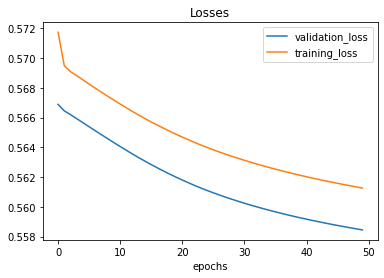

In [26]:
import numpy as np
from sklearn.metrics import confusion_matrix 
import matplotlib.pyplot as plt 
plt.plot(validation_loss, label="validation_loss") 
plt.plot(training_loss, label="training_loss") 
plt.legend()
plt.title("Losses")
plt.xlabel("epochs")
plt.show()
plt.close()

In [27]:
for param_tensor in model.state_dict():
 print(param_tensor, '\n', model.state_dict()[param_tensor].numpy())

fc1.weight 
 [[-0.22950542  0.0650059   0.06947339 -0.23736894]
 [-0.00496215  0.46714574  0.43046886 -0.24074152]
 [ 0.2540544   0.17603603 -0.13790116 -0.24654824]
 [ 0.09650353  0.28539297  0.53929675 -0.06045862]
 [ 0.51866865 -0.78937966 -0.26374972  0.04781744]
 [ 0.49840766 -0.05460461  0.24136558 -0.54242194]
 [-0.19796818  0.37904447  0.01019102 -0.10922724]
 [ 0.06744268 -0.12710167  0.1962342  -0.18676804]
 [-0.48130643  0.19778454  0.24319214 -0.3340642 ]
 [-0.20098954 -0.25836176 -0.24861455 -0.38273424]]
fc1.bias 
 [-0.08637297 -0.13117087 -0.18568388  0.24296625 -0.6776959   0.21295731
  0.03529936  0.11618599  0.08230311 -0.16986662]
fc2.weight 
 [[ 2.42098242e-01 -4.06808108e-01 -7.45385170e-01  4.90250997e-02
   9.82920647e-01  3.54742527e-01  2.09732130e-01  5.05541041e-02
   7.39483535e-02  9.77149084e-02]
 [ 1.51083604e-01 -1.76491112e-01  4.62028570e-02 -5.08039109e-02
   8.94653261e-01  6.45731390e-02  2.93445498e-01 -1.68072850e-01
   2.52025515e-01  2.93959677e

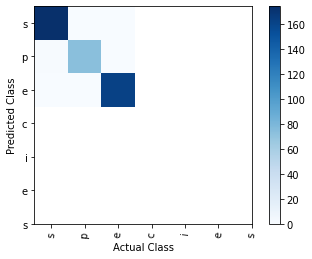

In [32]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
# Plot the confusion matrix
cm = confusion_matrix(test_y, predictions) 
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
penguin_classes= ['Adelie','Chinstrap','Gentoo']
tick_marks = np.arange(len(labels)) 
plt.xticks(tick_marks, labels, rotation=85) 
plt.yticks(tick_marks, labels) 
plt.xlabel("Actual Class")
plt.ylabel("Predicted Class")
plt.show()